In [1]:
import random
from faker import Faker
import pandas as pd

## semi_real_players
Сгенерировано Google gemini
обработка:
- удалены дубликаты
- замены Role на "C", "LW", "RW", "D", "G"
- замены Shoots на "L", "R"

In [78]:
df = pd.read_csv('./raw/semi_real_players.csv')

In [82]:
df.loc[df.Shoots.isnull(), 'Shoots'] = df.loc[df.Shoots.isnull(), 'Shoots'].apply(lambda x: random.choice(['L', 'R']))

In [3]:
clubs_count = 100
f_roles = ['C', 'LW', 'RW']
d_roles = ['D']
g_roles = ['G']
forward_count = 14
defense_count = 8
goalie_count = 3
players_count = forward_count + defense_count + goalie_count
total_players_count = clubs_count * players_count

total_forward_count = round(total_players_count * (forward_count / players_count))
total_defense_count = round(total_players_count * (defense_count / players_count))
total_goalie_count = round(total_players_count * (goalie_count / players_count))

# df.query('Role in @f_roles').shape[0]

total_remain_count = total_players_count - df.shape[0]

total_remain_forward_count = total_forward_count - df.query('Role in @f_roles').shape[0]
total_remain_defense_count = total_defense_count - df.query('Role in @d_roles').shape[0]
total_remain_goalie_count = total_goalie_count - df.query('Role in @g_roles').shape[0]
# total_forward_remain_counts = total_players_count * (for)

print(f'''
total_remain_forward_count: {total_remain_forward_count},
total_remain_defense_count: {total_remain_defense_count},
total_remain_goalie_count: {total_remain_goalie_count}
''')


total_remain_forward_count: 1050,
total_remain_defense_count: 562,
total_remain_goalie_count: 241



In [4]:
def generate_random_player(roles: list):
    '''roles list like ["C", "LW", "RW", "D", "G"]'''
    fake = Faker()
    return {
        "Player Name": fake.name(),
        "Date of Birth": fake.date_of_birth(),
        "Player Number": random.randint(1, 99),
        "Role": random.choice(roles),
        "Shoots": random.choice(["L", "R"]),
        "Height (cm)": random.randint(160, 200),
        "Weight (g)": random.randint(65000, 110000),
        "Citizenship": fake.country(),
    }

## Generate

### Forwards

In [5]:
f_players = [generate_random_player(f_roles) for _ in range(total_remain_forward_count)]

In [6]:
df_remain_f_players = pd.DataFrame(f_players)

### Defensemans

In [7]:
d_players = [generate_random_player(d_roles) for _ in range(total_remain_defense_count)]

In [8]:
df_remain_d_players = pd.DataFrame(d_players)

### Goalies

In [9]:
g_players = [generate_random_player(g_roles) for _ in range(total_remain_goalie_count)]

In [10]:
df_remain_g_players = pd.DataFrame(g_players)

## Combine

In [83]:
df = pd.concat([df, df_remain_f_players, df_remain_d_players, df_remain_g_players])

In [84]:
df.shape

(2500, 8)

In [85]:
df.head()

Player Name Date of Birth  Player Number Role Shoots  Height (cm)  \
0     Blake Wheeler    1990-01-01             26   RW      R          185   
1      Bryan Little    1991-02-02             19    C      R          183   
2  Dustin Byfuglien    1992-03-03             33    D      R          196   
3      Evander Kane    1993-04-04              9   LW      L          188   
4      Jacob Trouba    1994-05-05              4    D      R          191   

   Weight (g) Citizenship  
0       90720      Canada  
1       83720      Canada  
2      108860      Canada  
3       96950      Canada  
4       95250      Canada

In [86]:
df.duplicated().sum()

0

<Axes: >

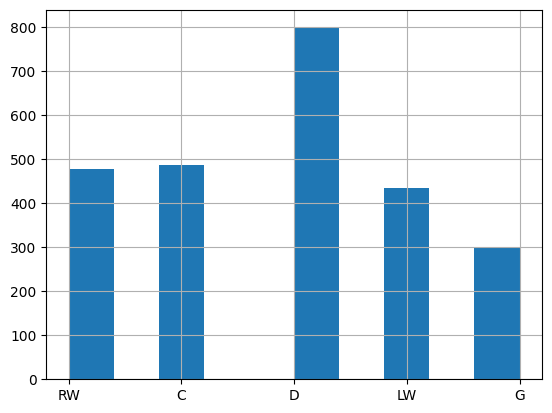

In [87]:
df.Role.hist()

<Axes: >

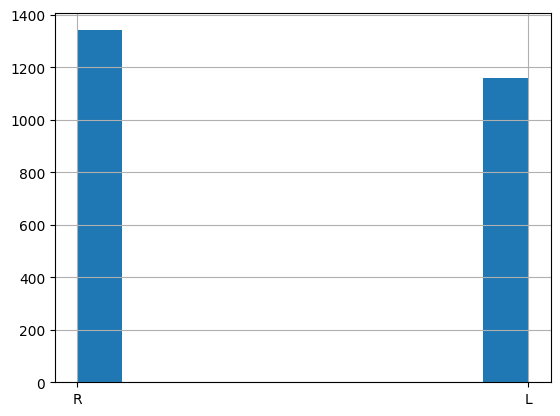

In [88]:
df.Shoots.hist()

<pre>
DROP TABLE IF EXISTS dt.[Player]
CREATE TABLE dt.[Player] (
    [PlayerID] uniqueidentifier NOT NULL DEFAULT NEWSEQUENTIALID(),
    [FirstName] NVARCHAR(50) NOT NULL ,
    [SecondName] NVARCHAR(50) NOT NULL ,
    [DateOfBirth] Date NOT NULL ,
    [Num] int NOT NULL ,
    -- C, LW, RW, D, G
    [Role] NVARCHAR(2) NOT NULL ,
    -- L - left R - right
    [Shoots] NVARCHAR(1) NOT NULL ,
    -- centimeter
    [Height] int NOT NULL ,
    -- gramm
    [Weight] int NOT NULL ,
    [Сitizenship] NVARCHAR(50) NOT NULL ,
    [FirstEventID] uniqueidentifier  NULL ,
    CONSTRAINT [PK_Player] PRIMARY KEY CLUSTERED (
        [PlayerID] ASC
    )
)
<pre>

In [89]:
df[['FirstName', 'SecondName']] = df['Player Name'].str.extract(r'(?P<FirstName>.+) (?P<SecondName>.+)')

In [90]:
df['Citizenship'] = df.Citizenship.str[:50]

In [91]:
df.drop('Player Name', axis=1, inplace=True)

In [92]:
df = df.rename(
    columns={
        'Date of Birth':'DateOfBirth',
        'Height (cm)': 'Height',
        'Weight (g)': 'Weight',
        'Player Number': 'Num'
    }
)

In [93]:
df = df[['FirstName', 'SecondName', 'DateOfBirth', 'Num', 'Role', 'Shoots', 'Height', 'Weight', 'Citizenship']]

In [94]:
df.to_csv('players.csv', index=0)

In [95]:
df.isnull().sum()

FirstName      0
SecondName     0
DateOfBirth    0
Num            0
Role           0
Shoots         0
Height         0
Weight         0
Citizenship    0
dtype: int64